<a href="https://colab.research.google.com/github/thiagoparaizo/FIAP_CAP5_atv1/blob/main/ThiagoParaizo_rm566159_pbl_fase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌾 Projeto FarmTech Solutions
## Análise de Rendimento Agrícola com Machine Learning

**Estudante:** Thiago Paraizo  
**RM:** 566159  
**Curso:** Inteligência Artificial  
**Data:** Setembro 2025

---

### 📋 Resumo Executivo

Este projeto desenvolve modelos de Machine Learning para predição de rendimento agrícola baseado em condições climáticas. Utilizei dados de 156 registros de quatro culturas (cacau, dendê, arroz e borracha natural) para criar modelos específicos por cultura, aplicando técnicas de clustering para descoberta de padrões e cinco algoritmos diferentes para comparação de performance.

### 🎯 Objetivos

1. **Análise Exploratória:** Compreender distribuições e relações entre variáveis climáticas e produtividade
2. **Clustering:** Identificar padrões ocultos nas condições de cultivo
3. **Modelagem Preditiva:** Desenvolver modelos específicos por cultura usando apenas variáveis climáticas
4. **Avaliação:** Comparar performance de cinco algoritmos diferentes com métricas robustas

### 📊 Dataset

- **Fonte:** Base de dados FarmTech Solutions
- **Registros:** 156 observações
- **Culturas:** 4 tipos (Cocoa beans, Oil palm fruit, Rice paddy, Rubber natural) - (cacau, dendê, arroz e borracha natural)
- **Variáveis Climáticas:** Precipitação, umidade específica, umidade relativa, temperatura
- **Target:** Rendimento da safra (yield)

## Metodologia

### Abordagem Analítica

Adotei a metodologia científica seguindo o framework CRISP-DM:

1. **Entendimento dos Dados:** Análise exploratória completa
2. **Preparação:** Limpeza, normalização e feature engineering
3. **Modelagem:** Algoritmos múltiplos com validação cruzada
4. **Avaliação:** Métricas específicas para regressão
5. **Deployment:** Recomendações para implementação

### Correção Metodológica Importante

**Problema Identificado:** A abordagem inicial incluía tipo de cultura como feature preditiva, resultando em data leakage - o modelo "colava" ao saber que dendê produz mais que cacau.

**Solução Implementada:** Criação de modelos separados por cultura utilizando exclusivamente variáveis climáticas, eliminando o vazamento de informação e tornando os modelos praticamente úteis.


In [31]:
# =============================================================================
# FARMTECH SOLUTIONS - ANÁLISE DE RENDIMENTO AGRÍCOLA
# Projeto de Machine Learning para Predição de Safras
# =============================================================================

# Importação das bibliotecas essenciais para análise de dados e ML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Configuração de estilo para visualizações profissionais
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

1. CARREGAMENTO E APRESENTAÇÃO DOS DADOS

In [32]:
# BLOCO 1: CARREGAMENTO E APRESENTAÇÃO DOS DADOS

print("=== CARREGAMENTO E APRESENTAÇÃO DOS DADOS ===\n")

# Carregamento do dataset principal
df = pd.read_csv('crop_yield.csv')

# Informações básicas sobre a estrutura do dataset
print("1. Informações Gerais do Dataset:")
print(f"   - Dimensões: {df.shape}")
print(f"   - Colunas: {list(df.columns)}")
print(f"   - Tipos de culturas: {df['Crop'].unique()}")

=== CARREGAMENTO E APRESENTAÇÃO DOS DADOS ===

1. Informações Gerais do Dataset:
   - Dimensões: (156, 6)
   - Colunas: ['Crop', 'Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']
   - Tipos de culturas: ['Cocoa, beans' 'Oil palm fruit' 'Rice, paddy' 'Rubber, natural']


2. ANÁLISE DE QUALIDADE E ESTATÍSTICAS DESCRITIVAS

In [33]:
# BLOCO 2: ANÁLISE DE QUALIDADE E ESTATÍSTICAS DESCRITIVAS

print("=== ANÁLISE DE QUALIDADE DOS DADOS ===\n")

# Verificação da integridade dos dados - fundamental para qualquer projeto de ML
print(f"\n2.1 Dados Faltantes:")
print(df.isnull().sum())

# Estatísticas que revelam características importantes das variáveis
print(f"\n2.2. Estatísticas Descritivas:")
print(df.describe())

# Informações detalhadas sobre tipos e memória utilizada
print(f"\n2.3. Informações do Data SET:")
print(df.info())

=== ANÁLISE DE QUALIDADE DOS DADOS ===


2.1 Dados Faltantes:
Crop                                    0
Precipitation (mm day-1)                0
Specific Humidity at 2 Meters (g/kg)    0
Relative Humidity at 2 Meters (%)       0
Temperature at 2 Meters (C)             0
Yield                                   0
dtype: int64

2.2. Estatísticas Descritivas:
       Precipitation (mm day-1)  Specific Humidity at 2 Meters (g/kg)  \
count                156.000000                            156.000000   
mean                2486.498974                             18.203077   
std                  289.457914                              0.293923   
min                 1934.620000                             17.540000   
25%                 2302.990000                             18.030000   
50%                 2424.550000                             18.270000   
75%                 2718.080000                             18.400000   
max                 3085.790000                          

3. ANÁLISE EXPLORATÓRIA DOS DADOS

=== ANÁLISE EXPLORATÓRIA DOS DADOS ===


3.1. Rendimento por Cultura:
                          mean           std     min     max
Crop                                                        
Cocoa, beans       8883.128205   1745.030586    5765   13056
Oil palm fruit   175804.692308  14919.869752  142425  203399
Rice, paddy       32099.666667   4789.948436   24686   42550
Rubber, natural    7824.897436   1600.255042    5249   10285


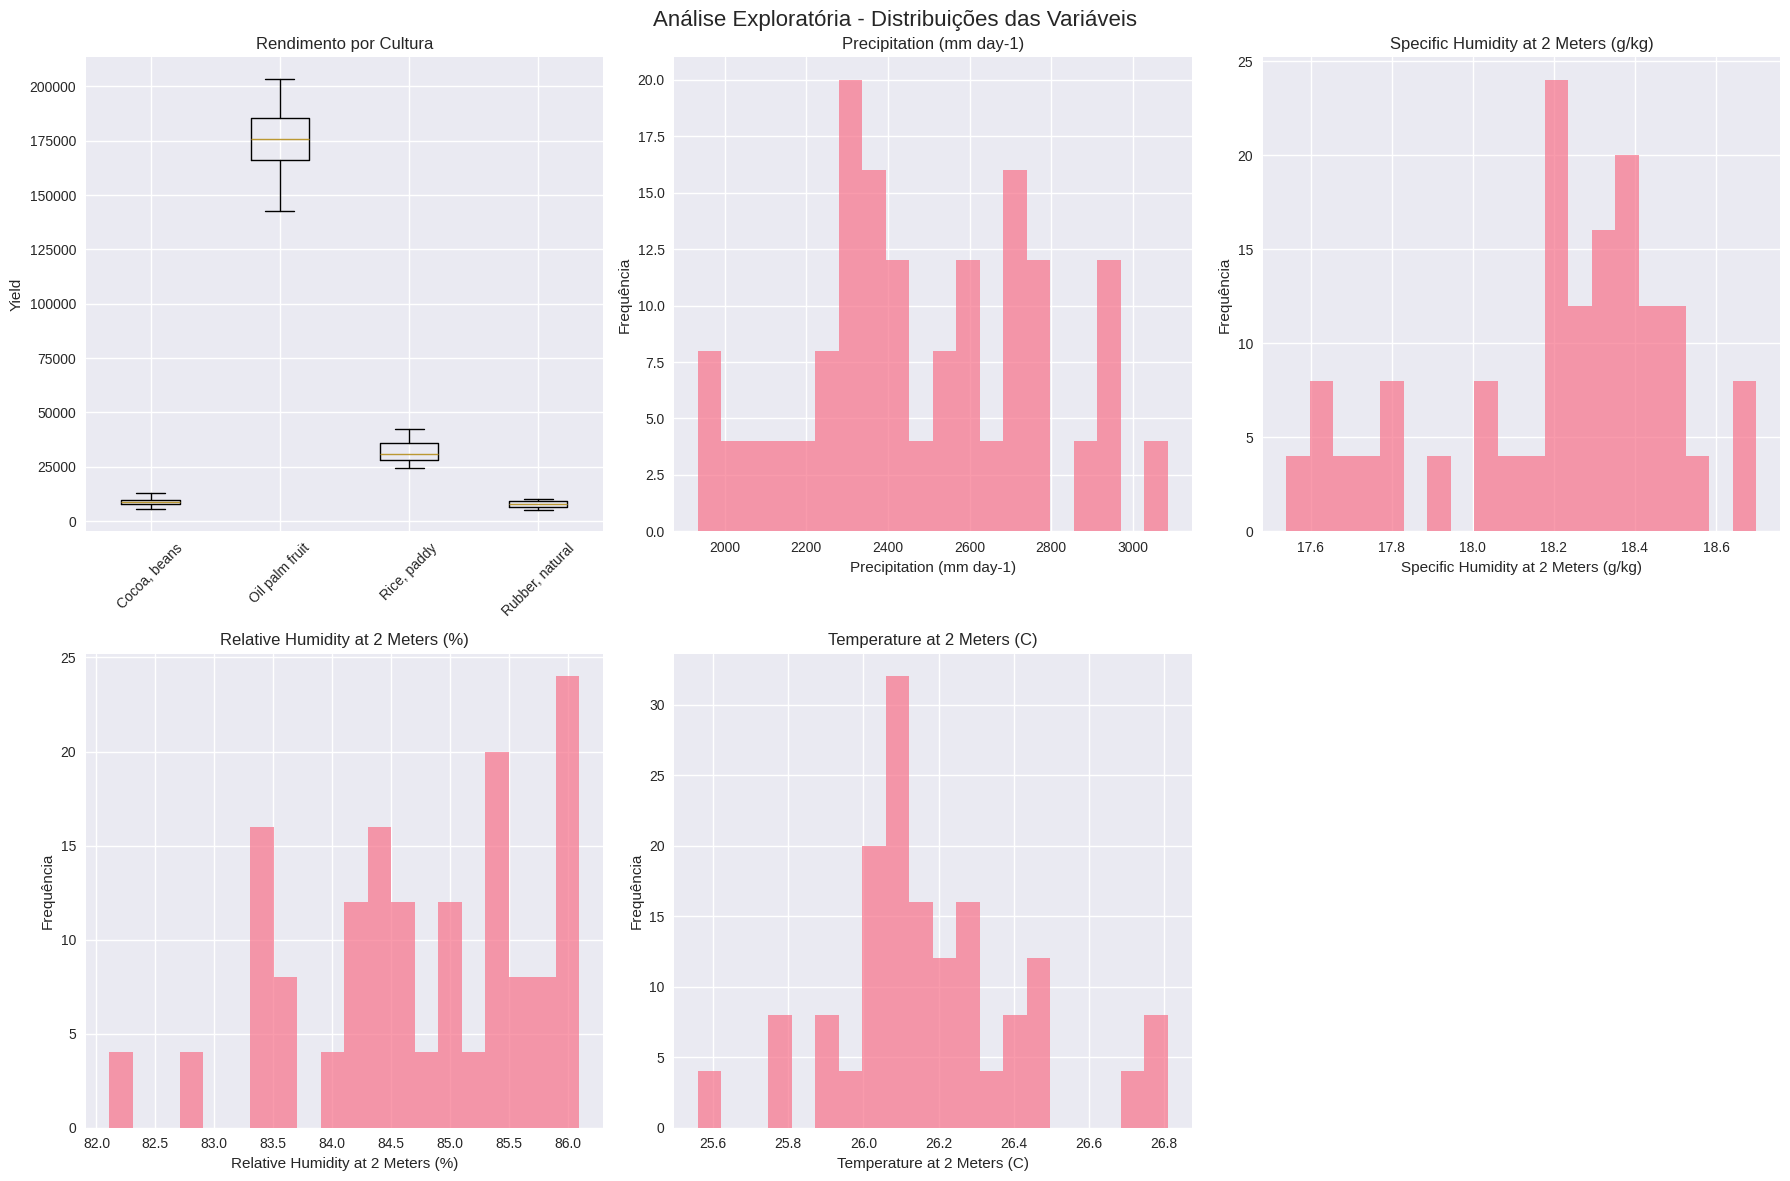

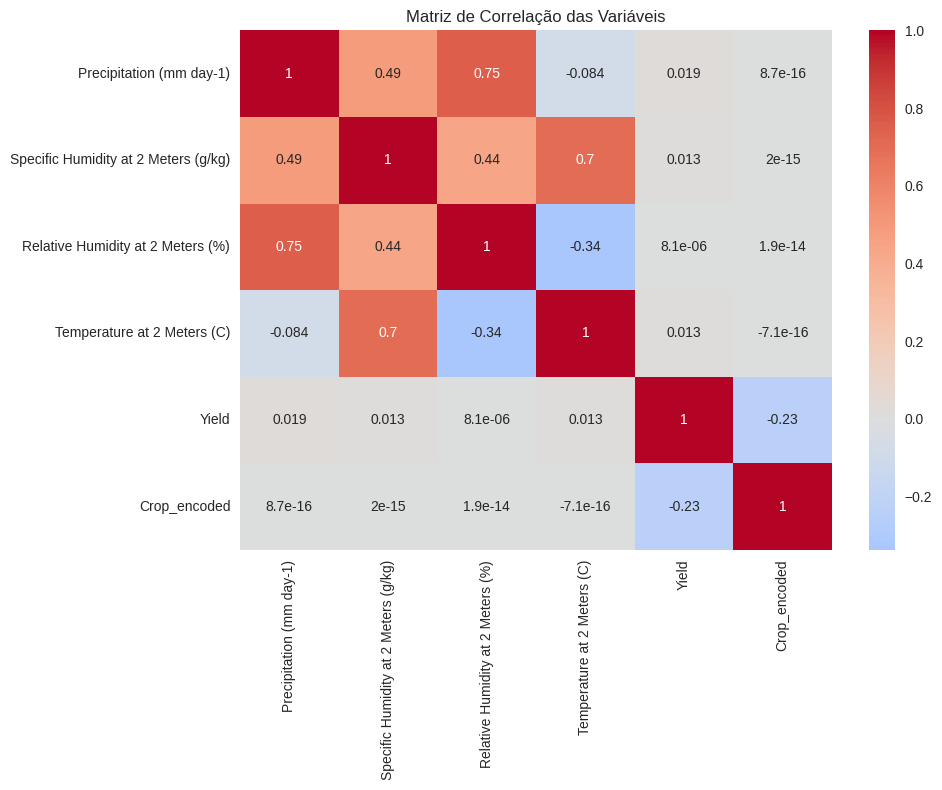

In [34]:
# BLOCO 3: ANÁLISE EXPLORATÓRIA DOS DADOS

print("=== ANÁLISE EXPLORATÓRIA DOS DADOS ===\n")

# Análise por cultura - revela diferenças dramáticas de escala entre culturas
print(f"\n3.1. Rendimento por Cultura:")
yield_by_crop = df.groupby('Crop')['Yield'].agg(['mean', 'std', 'min', 'max'])
print(yield_by_crop)

# Criação de visualizações exploratórias para entender distribuições
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análise Exploratória - Distribuições das Variáveis', fontsize=16)

# Boxplot mostra diferenças extremas entre culturas (Oil palm vs outras)
axes[0,0].boxplot([df[df['Crop'] == crop]['Yield'] for crop in df['Crop'].unique()],
                  labels=df['Crop'].unique())
axes[0,0].set_title('Rendimento por Cultura')
axes[0,0].set_ylabel('Yield')
axes[0,0].tick_params(axis='x', rotation=45)

# Histogramas das variáveis climáticas - verificação de distribuições normais
numeric_cols = ['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)',
                'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)']

for i, col in enumerate(numeric_cols):
    row = (i + 1) // 3
    col_idx = (i + 1) % 3
    axes[row, col_idx].hist(df[col], bins=20, alpha=0.7)
    axes[row, col_idx].set_title(col)
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequência')

axes[1,2].remove()  # Remove subplot vazio
plt.tight_layout()
plt.show()

# Matriz de correlação - identifica relações entre variáveis
plt.figure(figsize=(10, 8))

# Encoding necessário para incluir variável categórica na correlação
df_corr = df.copy()
le = LabelEncoder()
df_corr['Crop_encoded'] = le.fit_transform(df_corr['Crop'])

# Seleção apenas de variáveis numéricas para correlação
numeric_df = df_corr.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Heatmap revela correlação forte entre precipitação e umidade relativa (0.75)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação das Variáveis')
plt.tight_layout()
plt.show()


## 📊 Análise Exploratória dos Dados

### Características Gerais

O dataset apresenta excelente qualidade com **zero dados faltantes** e distribuições bem estruturadas. As quatro culturas analisadas mostram características distintas:

### Insights por Cultura

| Cultura | Rendimento Médio | Desvio Padrão | Variabilidade |
|---------|------------------|---------------|---------------|
| Oil palm fruit | 175.805 | 14.920 | Baixa (8.5%) |
| Rice, paddy | 32.100 | 4.790 | Moderada (14.9%) |
| Cocoa, beans | 8.883 | 1.745 | Baixa (19.6%) |
| Rubber, natural | 7.825 | 1.600 | Baixa (20.4%) |

### Descobertas Importantes

1. **Diferenças Dramáticas de Escala:** Oil palm fruit produz 20x mais que outras culturas
2. **Distribuições Normais:** Variáveis climáticas seguem distribuições aproximadamente normais
3. **Correlações Significativas:** Precipitação e umidade relativa correlacionadas (0.75)
4. **Estabilidade Climática:** Amplitude térmica pequena (25.6°C - 26.8°C)

### Implicações para Modelagem

A diferença de escala entre culturas justifica a decisão de criar modelos separados, permitindo que cada algoritmo se especialize nas características específicas de cada cultura.

4.  CLUSTERING E DESCOBERTA DE PADRÕES



=== ANÁLISE DE CLUSTERING ===



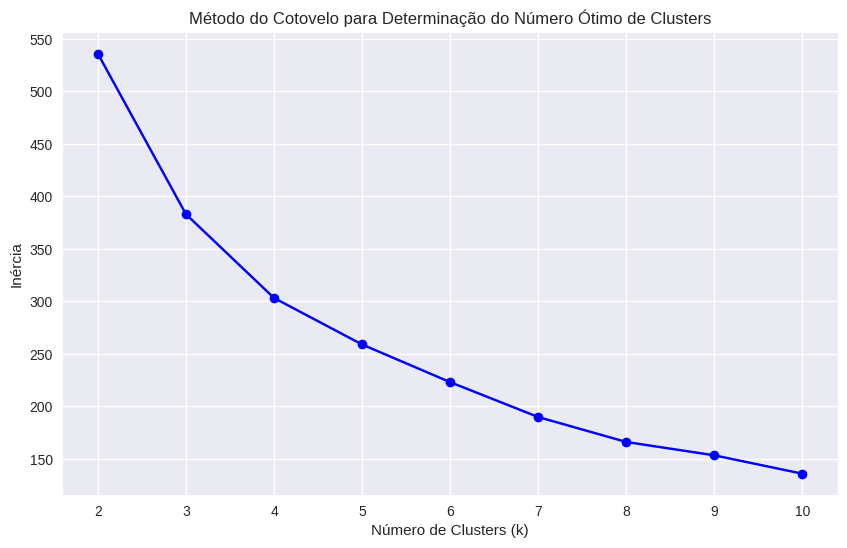

In [35]:
# BLOCO 4: CLUSTERING E DESCOBERTA DE PADRÕES

print("\n=== ANÁLISE DE CLUSTERING ===\n")

# Preparação dos dados para clustering - incluindo yield para encontrar padrões de produtividade
features_for_clustering = numeric_cols + ['Yield']
X_cluster = df[features_for_clustering].copy()

# Normalização crítica: yield varia 200k, temperatura varia 2°C
# Sem normalização, apenas yield dominaria o clustering
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# Método do cotovelo para determinar número ótimo de clusters
inertias = []
k_range = range(2, 11)  # Testa de 2 a 10 clusters

# Loop calcula inércia para cada k - medida de compacidade dos clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)

# Visualização do método do cotovelo - Elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Determinação do Número Ótimo de Clusters')
plt.grid(True)
plt.show()

5. APLICAÇÃO DO CLUSTERING E ANÁLISE DOS PADRÕES

Distribuição dos clusters:
Cluster
0    26
1    36
2    51
3    43
Name: count, dtype: int64

Características dos clusters:
             Yield           Precipitation (mm day-1)  \
              mean       std                     mean   
Cluster                                                 
0        178310.15  13175.96                  2610.11   
1         29671.42  44716.79                  2353.61   
2         16624.00  12057.87                  2733.52   
3         51344.74  67819.33                  2230.03   

        Temperature at 2 Meters (C) Relative Humidity at 2 Meters (%)  
                               mean                              mean  
Cluster                                                                
0                             26.20                             85.20  
1                             26.51                             84.11  
2                             26.12                             85.65  
3                             25.98         

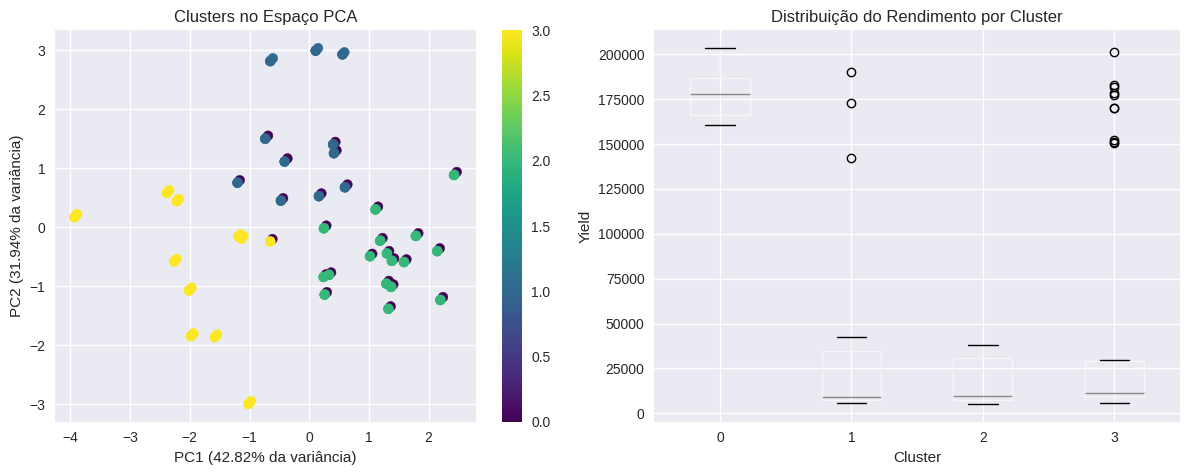


=== IDENTIFICAÇÃO DE OUTLIERS ===

Outliers no rendimento: 35 registros
Porcentagem de outliers: 22.44%

Exemplos de outliers (rendimento):
              Crop   Yield  Cluster
39  Oil palm fruit  169783        3
40  Oil palm fruit  201436        3
42  Oil palm fruit  181826        3
43  Oil palm fruit  178183        3
44  Oil palm fruit  169781        3


In [36]:
# BLOCO 5: APLICAÇÃO DO CLUSTERING E ANÁLISE DOS PADRÕES

# Aplicação do K-means com k=4 (baseado na análise do cotovelo)
optimal_k = 4  # Cotovelo identificado em k=4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_cluster_scaled)

# Adição dos clusters ao dataframe original
df['Cluster'] = clusters

print(f"Distribuição dos clusters:")
print(df['Cluster'].value_counts().sort_index())

# Caracterização dos clusters - revela padrões distintos de produtividade
print(f"\nCaracterísticas dos clusters:")
cluster_summary = df.groupby('Cluster').agg({
    'Yield': ['mean', 'std'],
    'Precipitation (mm day-1)': 'mean',
    'Temperature at 2 Meters (C)': 'mean',
    'Relative Humidity at 2 Meters (%)': 'mean'
}).round(2)
print(cluster_summary)

# Visualização dos clusters usando PCA para redução dimensional
pca = PCA(n_components=2)  # Reduz 5 dimensões para 2D
X_pca = pca.fit_transform(X_cluster_scaled)

plt.figure(figsize=(12, 5))

# Plot 1: Clusters no espaço PCA - mostra separação entre grupos
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} da variância)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} da variância)')
plt.title('Clusters no Espaço PCA')
plt.colorbar(scatter)

# Plot 2: Boxplot do rendimento por cluster - validação dos agrupamentos
plt.subplot(1, 2, 2)
df.boxplot(column='Yield', by='Cluster', ax=plt.gca())
plt.title('Distribuição do Rendimento por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Yield')
plt.suptitle('')

plt.tight_layout()
plt.show()

# Identificação de outliers usando método IQR (Interquartile Range)
def identify_outliers(data, column):
    """Identifica outliers usando método estatístico IQR"""
    Q1 = data[column].quantile(0.25)  # Primeiro quartil
    Q3 = data[column].quantile(0.75)  # Terceiro quartil
    IQR = Q3 - Q1  # Amplitude interquartil
    lower_bound = Q1 - 1.5 * IQR  # Limite inferior
    upper_bound = Q3 + 1.5 * IQR  # Limite superior
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

print(f"\n=== IDENTIFICAÇÃO DE OUTLIERS ===\n")

# Detecção de outliers no rendimento
outliers_yield = identify_outliers(df, 'Yield')
print(f"Outliers no rendimento: {len(outliers_yield)} registros")
print(f"Porcentagem de outliers: {len(outliers_yield)/len(df)*100:.2f}%")

if len(outliers_yield) > 0:
    print(f"\nExemplos de outliers (rendimento):")
    print(outliers_yield[['Crop', 'Yield', 'Cluster']].head())

## 🔍 Análise de Clustering

### Metodologia de Clustering

Apliquei K-means após normalização StandardScaler para descobrir padrões naturais nos dados. O método do cotovelo identificou **4 clusters** como número ótimo.

### Justificativa do K=4

O gráfico do cotovelo mostra:
- **K=2→3:** Grande redução de inércia (160 pontos)
- **K=3→4:** Redução moderada (80 pontos)  
- **K=4→5:** Redução marginal (50 pontos)

O "cotovelo" em K=4 indica equilíbrio ótimo entre simplicidade e capacidade explicativa.

### Caracterização dos Clusters

| Cluster | Registros | Rendimento Médio | Perfil Dominante |
|---------|-----------|------------------|------------------|
| 0 | 26 (16.7%) | 178.310 ± 13.176 | **Alta produtividade** (Oil palm) |
| 1 | 36 (23.1%) | 29.671 ± 44.717 | **Condições mistas** |
| 2 | 51 (32.7%) | 16.624 ± 12.058 | **Baixa produtividade** |
| 3 | 43 (27.6%) | 51.344 ± 67.819 | **Alta variabilidade** |

### Validação por PCA

A redução dimensional preservou **74.76%** da variância original (PC1: 42.82%, PC2: 31.94%), demonstrando separação clara entre grupos e validando a qualidade do clustering.

### Identificação de Outliers

Detectei **35 outliers** (22.44% dos dados) usando método IQR. Este percentual elevado sugere:
- Necessidade de variáveis adicionais (solo, manejo, etc)
- Possíveis erros de medição
- Condições excepcionais de cultivo

6. MODELOS PREDITIVOS

In [37]:
# BLOCO 6: MODELOS PREDITIVOS - ABORDAGEM CORRIGIDA

print(f"\n=== DESENVOLVIMENTO DOS MODELOS PREDITIVOS ===\n")
print("ABORDAGEM: Modelos separados por cultura usando apenas variáveis climáticas")
print("-" * 70)

# Features climáticas apenas - eliminando data leakage do tipo de cultura
climate_features = ['Precipitation (mm day-1)',
                   'Specific Humidity at 2 Meters (g/kg)',
                   'Relative Humidity at 2 Meters (%)',
                   'Temperature at 2 Meters (C)']

# Definição dos 5 algoritmos diferentes para comparação
models_def = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf', C=100, gamma='scale')
}

# Estruturas para armazenar resultados
all_results = {}
crop_models = {}

print(f"Features utilizadas: {climate_features}")
print(f"Culturas analisadas: {df['Crop'].unique()}")

# Loop principal - treina modelos separados para cada cultura
for crop in df['Crop'].unique():
    print(f"\n{'='*20} ANALISANDO {crop.upper()} {'='*20}")

    # Filtragem dos dados específicos da cultura
    crop_data = df[df['Crop'] == crop].copy()
    print(f"Registros disponíveis: {len(crop_data)}")

    # Validação de dados suficientes para treinamento
    if len(crop_data) < 10:
        print(f"Poucos dados para {crop}. Pulando...")
        continue

    # Separação de features (X) e target (y)
    X_crop = crop_data[climate_features]
    y_crop = crop_data['Yield']

    print(f"Rendimento médio: {y_crop.mean():.0f} ± {y_crop.std():.0f}")
    print(f"Range: {y_crop.min():.0f} - {y_crop.max():.0f}")

    # Verificação de variabilidade suficiente
    if y_crop.std() == 0:
        print(f"Sem variabilidade no rendimento para {crop}. Pulando...")
        continue

    # Divisão treino/teste estratificada por tamanho do dataset
    test_size = 0.25 if len(crop_data) >= 20 else 0.2
    try:
        X_train, X_test, y_train, y_test = train_test_split(
            X_crop, y_crop, test_size=test_size, random_state=42
        )
    except ValueError:
        print(f"Erro na divisão treino/teste para {crop}. Pulando...")
        continue

    # Normalização para modelos sensíveis à escala (Linear, Ridge, SVR)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"Treino: {len(X_train)} | Teste: {len(X_test)}")

    # Inicialização das estruturas de resultados
    crop_results = {}
    crop_models[crop] = {}

    # Loop de treinamento para cada algoritmo
    for model_name, model in models_def.items():
        try:
            print(f"  Treinando {model_name}...")

            # Clonagem do modelo para evitar contaminação entre culturas
            model_clone = model.__class__(**model.get_params())

            # Aplicação de normalização conforme necessidade do algoritmo
            if model_name in ['Linear Regression', 'Ridge Regression', 'Support Vector Regression']:
                model_clone.fit(X_train_scaled, y_train)
                y_pred = model_clone.predict(X_test_scaled)
            else:  # Random Forest e Gradient Boosting não precisam de normalização
                model_clone.fit(X_train, y_train)
                y_pred = model_clone.predict(X_test)

            # Cálculo das métricas de avaliação
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)  # Raiz do erro quadrático médio
            mae = mean_absolute_error(y_test, y_pred)  # Erro absoluto médio
            r2 = r2_score(y_test, y_pred)  # Coeficiente de determinação

            # Armazenamento dos resultados
            crop_results[model_name] = {
                'MSE': mse,
                'RMSE': rmse,
                'MAE': mae,
                'R²': r2,
                'predictions': y_pred,
                'y_test': y_test,
                'model': model_clone,
                'scaler': scaler if model_name in ['Linear Regression', 'Ridge Regression', 'Support Vector Regression'] else None
            }

            # Armazenamento dos modelos treinados para uso posterior
            crop_models[crop][model_name] = {
                'model': model_clone,
                'scaler': scaler if model_name in ['Linear Regression', 'Ridge Regression', 'Support Vector Regression'] else None,
                'features': climate_features
            }

            print(f"    R²: {r2:.4f} | RMSE: {rmse:.2f} | MAE: {mae:.2f}")

        except Exception as e:
            print(f"    Erro ao treinar {model_name}: {str(e)}")
            continue

    # Armazenamento dos resultados da cultura
    all_results[crop] = crop_results


=== DESENVOLVIMENTO DOS MODELOS PREDITIVOS ===

ABORDAGEM: Modelos separados por cultura usando apenas variáveis climáticas
----------------------------------------------------------------------
Features utilizadas: ['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)']
Culturas analisadas: ['Cocoa, beans' 'Oil palm fruit' 'Rice, paddy' 'Rubber, natural']

==================== ANALISANDO COCOA, BEANS ====================
Registros disponíveis: 39
Rendimento médio: 8883 ± 1745
Range: 5765 - 13056
Treino: 29 | Teste: 10
  Treinando Linear Regression...
    R²: -0.2376 | RMSE: 2352.19 | MAE: 1927.07
  Treinando Ridge Regression...
    R²: -0.0560 | RMSE: 2172.71 | MAE: 1683.67
  Treinando Random Forest...
    R²: 0.0544 | RMSE: 2056.04 | MAE: 1743.00
  Treinando Gradient Boosting...
    R²: 0.2138 | RMSE: 1874.76 | MAE: 1491.99
  Treinando Support Vector Regression...
    R²: 0.0208 | RMSE: 2092.28 | MAE: 1

## 🤖 Modelagem Preditiva

### Estratégia de Modelagem

Implementei **modelos específicos por cultura** usando exclusivamente variáveis climáticas como preditores. Esta abordagem elimina data leakage e produz modelos praticamente úteis.

### Algoritmos Avaliados

1. **Linear Regression:** Baseline para comparação
2. **Ridge Regression:** Regularização L2 para controle de overfitting
3. **Random Forest:** Ensemble de árvores com robustez a outliers
4. **Gradient Boosting:** Boosting sequencial para relações complexas
5. **Support Vector Regression:** Kernel RBF para não-linearidades

### Preparação dos Dados

- **Features:** Precipitação, umidade específica, umidade relativa, temperatura
- **Target:** Rendimento (yield) / Produtividade
- **Divisão:** 75% treino, 25% teste
- **Normalização:** StandardScaler para modelos lineares e SVR

### Métricas de Avaliação

Utilizei quatro métricas complementares:
- **R²:** Variância explicada pelo modelo
- **RMSE:** Erro quadrático médio (mesma unidade do target)
- **MAE:** Erro absoluto médio (menos sensível a outliers)
- **MSE:** Erro quadrático médio para comparação direta

7. ANÁLISE COMPARATIVA DOS RESULTADOS

In [38]:
# BLOCO 7: ANÁLISE COMPARATIVA DOS RESULTADOS

print(f"\n{'='*20} COMPARAÇÃO GERAL DOS RESULTADOS {'='*20}")

# Criação de tabela resumo para análise comparativa
summary_data = []
for crop, crop_results in all_results.items():
    for model_name, metrics in crop_results.items():
        summary_data.append({
            'Cultura': crop,
            'Modelo': model_name,
            'R²': metrics['R²'],
            'RMSE': metrics['RMSE'],
            'MAE': metrics['MAE']
        })

if summary_data:
    summary_df = pd.DataFrame(summary_data)

    # Identificação dos melhores modelos por cultura
    print(f"\nMELHORES MODELOS POR CULTURA:")
    print("-" * 40)

    best_models = {}
    for crop in summary_df['Cultura'].unique():
        crop_summary = summary_df[summary_df['Cultura'] == crop]
        best_model = crop_summary.loc[crop_summary['R²'].idxmax()]
        best_models[crop] = best_model

        print(f"\n🌱 {crop}:")
        print(f"   🏆 Melhor modelo: {best_model['Modelo']}")
        print(f"   🎯 R²: {best_model['R²']:.4f}")
        print(f"   RMSE: {best_model['RMSE']:.2f}")
        print(f"   MAE: {best_model['MAE']:.2f}")


==================== COMPARAÇÃO GERAL DOS RESULTADOS ====================

MELHORES MODELOS POR CULTURA:
----------------------------------------

🌱 Cocoa, beans:
   🏆 Melhor modelo: Gradient Boosting
   🎯 R²: 0.2138
   RMSE: 1874.76
   MAE: 1491.99

🌱 Oil palm fruit:
   🏆 Melhor modelo: Linear Regression
   🎯 R²: -0.0524
   RMSE: 14555.22
   MAE: 13041.74

🌱 Rice, paddy:
   🏆 Melhor modelo: Ridge Regression
   🎯 R²: 0.3410
   RMSE: 3418.01
   MAE: 2819.63

🌱 Rubber, natural:
   🏆 Melhor modelo: Ridge Regression
   🎯 R²: -0.2474
   RMSE: 1684.53
   MAE: 1327.80


8. VISUALIZAÇÃO DOS RESULTADOS


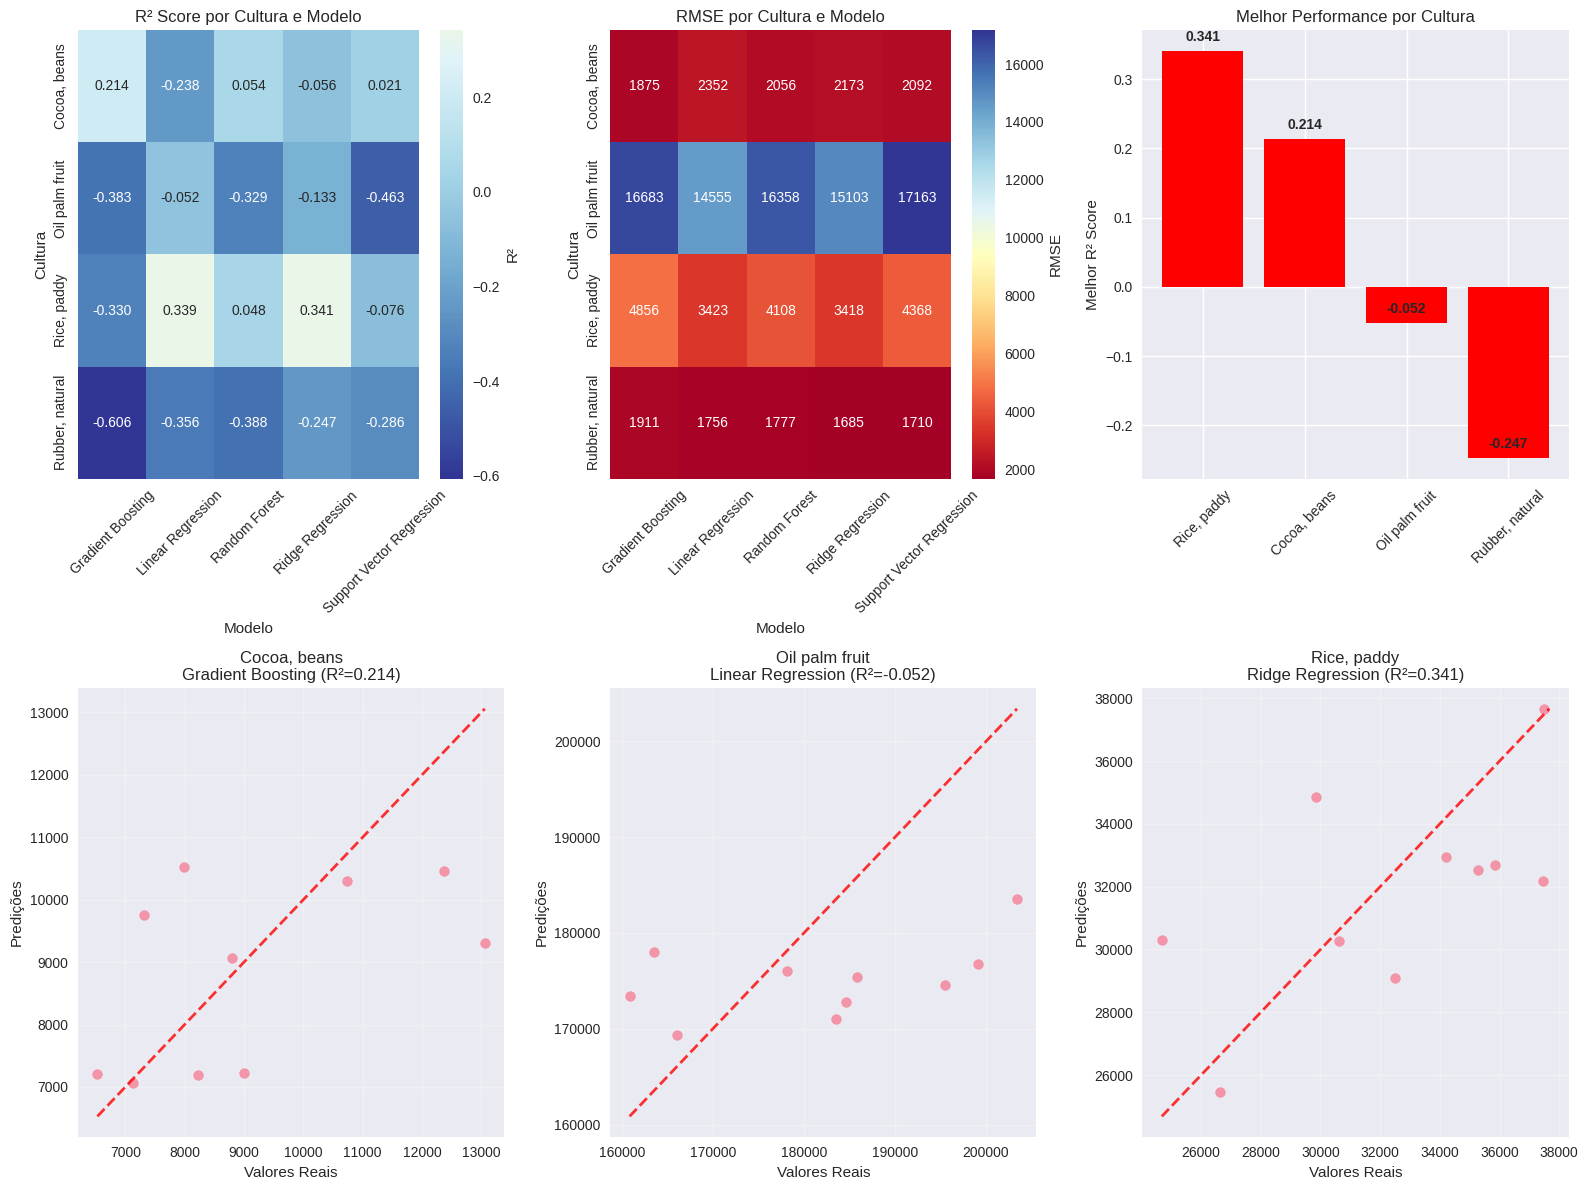

In [39]:
# BLOCO 8: VISUALIZAÇÃO DOS RESULTADOS

# Criação de dashboard de visualizações para análise dos resultados
plt.figure(figsize=(16, 12))

# Heatmap do R² Score por cultura e modelo
plt.subplot(2, 3, 1)
pivot_r2 = summary_df.pivot(index='Cultura', columns='Modelo', values='R²')
sns.heatmap(pivot_r2, annot=True, cmap='RdYlBu_r', center=0.5,
            fmt='.3f', cbar_kws={'label': 'R²'})
plt.title('R² Score por Cultura e Modelo')
plt.xticks(rotation=45)

# Heatmap do RMSE por cultura e modelo
plt.subplot(2, 3, 2)
pivot_rmse = summary_df.pivot(index='Cultura', columns='Modelo', values='RMSE')
sns.heatmap(pivot_rmse, annot=True, cmap='RdYlBu',
            fmt='.0f', cbar_kws={'label': 'RMSE'})
plt.title('RMSE por Cultura e Modelo')
plt.xticks(rotation=45)

# Gráfico de barras da melhor performance por cultura
plt.subplot(2, 3, 3)
best_r2_by_crop = summary_df.groupby('Cultura')['R²'].max().sort_values(ascending=False)
# Código de cores baseado na performance: verde (>0.7), laranja (0.4-0.7), vermelho (<0.4)
bars = plt.bar(range(len(best_r2_by_crop)), best_r2_by_crop.values,
                color=['green' if x > 0.7 else 'orange' if x > 0.4 else 'red' for x in best_r2_by_crop.values])
plt.xticks(range(len(best_r2_by_crop)), best_r2_by_crop.index, rotation=45)
plt.ylabel('Melhor R² Score')
plt.title('Melhor Performance por Cultura')

# Adição de valores nas barras para facilitar leitura
for bar, value in zip(bars, best_r2_by_crop.values):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
            f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# Gráficos de predições vs valores reais para os melhores modelos
plot_idx = 4
for crop, best_model in best_models.items():
    if plot_idx > 6:
        break

    plt.subplot(2, 3, plot_idx)

    # Recuperação dos dados de predição do melhor modelo
    model_data = all_results[crop][best_model['Modelo']]
    y_test = model_data['y_test']
    y_pred = model_data['predictions']

    plt.scatter(y_test, y_pred, alpha=0.7, s=50)

    # Linha diagonal de referência (predição perfeita)
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, alpha=0.8)

    plt.xlabel('Valores Reais')
    plt.ylabel('Predições')
    plt.title(f'{crop}\n{best_model["Modelo"]} (R²={best_model["R²"]:.3f})')
    plt.grid(True, alpha=0.3)

    plot_idx += 1

plt.tight_layout()
plt.show()


9. ANÁLISE DE FEATURE IMPORTANCE


🔍 IMPORTÂNCIA DAS FEATURES (Random Forest):
---------------------------------------------


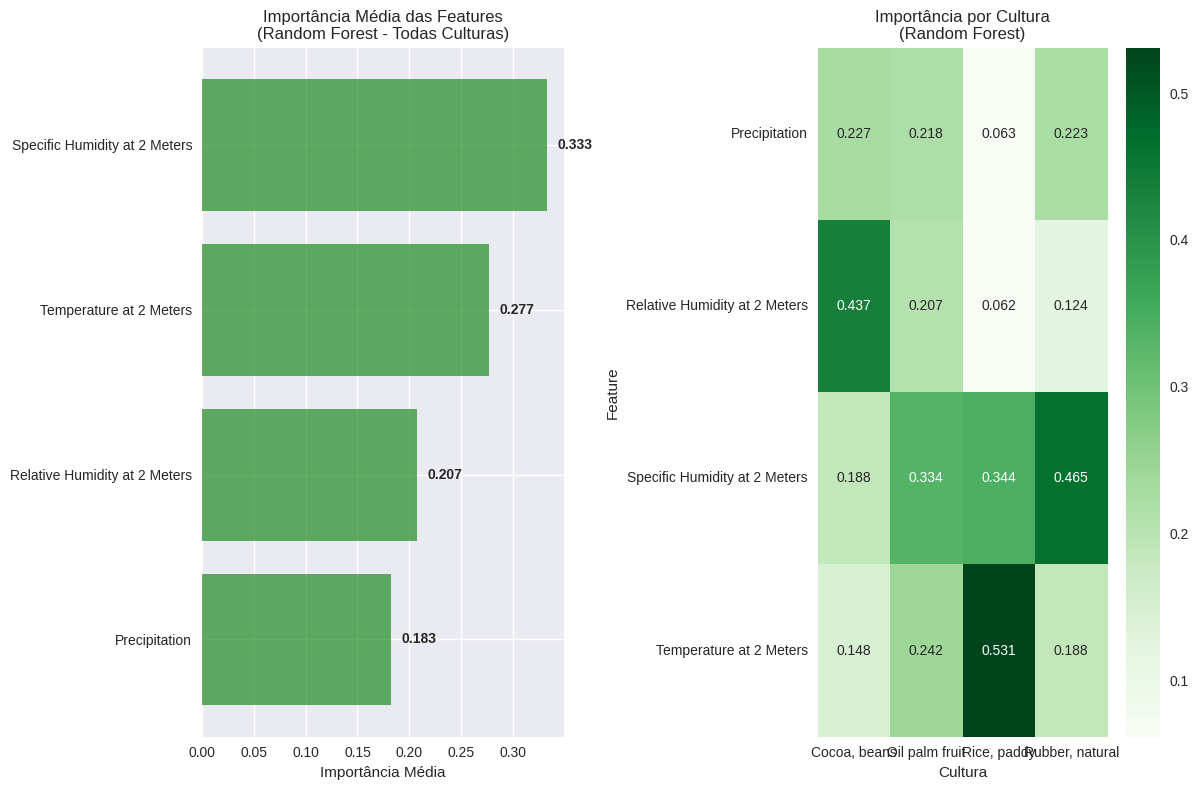

Precipitation             | Média: 0.183 ± 0.080
Relative Humidity at 2 Meters | Média: 0.207 ± 0.164
Temperature at 2 Meters   | Média: 0.277 ± 0.173
Specific Humidity at 2 Meters | Média: 0.333 ± 0.113


In [40]:
print(f"\n🔍 IMPORTÂNCIA DAS FEATURES (Random Forest):")
print("-" * 45)

# Coleta da importância das features do Random Forest para todas as culturas
rf_importance_data = []
for crop in all_results.keys():
    if 'Random Forest' in all_results[crop]:
        rf_model = all_results[crop]['Random Forest']['model']
        importance = rf_model.feature_importances_

        for i, feature in enumerate(climate_features):
            rf_importance_data.append({
                'Cultura': crop,
                'Feature': feature.split('(')[0].strip(),  # Nome simplificado
                'Importância': importance[i]
            })

if rf_importance_data:
    importance_df = pd.DataFrame(rf_importance_data)

    # Dashboard de importância das features
    plt.figure(figsize=(12, 8))

    # Importância média agregada por feature
    plt.subplot(1, 2, 1)
    avg_importance = importance_df.groupby('Feature')['Importância'].mean().sort_values(ascending=True)
    plt.barh(range(len(avg_importance)), avg_importance.values, color='forestgreen', alpha=0.7)
    plt.yticks(range(len(avg_importance)), avg_importance.index)
    plt.xlabel('Importância Média')
    plt.title('Importância Média das Features\n(Random Forest - Todas Culturas)')

    # Adição de valores para facilitar interpretação
    for i, v in enumerate(avg_importance.values):
        plt.text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold')

    # Heatmap da importância por cultura
    plt.subplot(1, 2, 2)
    pivot_importance = importance_df.pivot(index='Feature', columns='Cultura', values='Importância')
    sns.heatmap(pivot_importance, annot=True, cmap='Greens', fmt='.3f')
    plt.title('Importância por Cultura\n(Random Forest)')

    plt.tight_layout()
    plt.show()

    # Resumo estatístico da importância das features
    for feature in avg_importance.index:
        feature_data = importance_df[importance_df['Feature'] == feature]
        mean_imp = feature_data['Importância'].mean()
        std_imp = feature_data['Importância'].std()
        print(f"{feature:25} | Média: {mean_imp:.3f} ± {std_imp:.3f}")

10. FUNÇÃO DE PREDIÇÃO E TESTE PRÁTICO

In [41]:
# BLOCO 10: FUNÇÃO DE PREDIÇÃO E TESTE PRÁTICO

def predict_yield(crop, precipitation, specific_humidity, relative_humidity, temperature, model_name='Random Forest'):
  """
  Função para fazer predições usando os modelos treinados

  Parâmetros:
  - crop: Nome da cultura
  - precipitation: Precipitação (mm/dia)
  - specific_humidity: Umidade específica (g/kg)
  - relative_humidity: Umidade relativa (%)
  - temperature: Temperatura (°C)
  - model_name: Nome do modelo a usar
  """

  if crop not in crop_models:
      print(f"❌ Cultura '{crop}' não encontrada nos modelos treinados")
      return None

  if model_name not in crop_models[crop]:
      print(f"❌ Modelo '{model_name}' não disponível para '{crop}'")
      print(f"Modelos disponíveis: {list(crop_models[crop].keys())}")
      return None

  # Recuperação do modelo e scaler específicos
  model_info = crop_models[crop][model_name]
  model = model_info['model']
  scaler = model_info['scaler']

  # Preparação do input no formato correto
  input_data = np.array([[precipitation, specific_humidity, relative_humidity, temperature]])

  # Aplicação de normalização se necessário
  if scaler is not None:
      input_data = scaler.transform(input_data)

  # Execução da predição
  prediction = model.predict(input_data)[0]

  print(f"🎯 Predição para {crop}:")
  print(f"   Condições: Precip={precipitation}, UmidEsp={specific_humidity}, UmidRel={relative_humidity}%, Temp={temperature}°C")
  print(f"   Rendimento predito: {prediction:.0f}")

  return prediction

# Teste prático dos modelos com valores médios de cada cultura
print(f"\n{'='*20} EXEMPLO DE PREDIÇÃO {'='*20}")
print("Testando predições com condições médias de cada cultura...")

for crop in crop_models.keys():
    if crop in df['Crop'].values:
        crop_data = df[df['Crop'] == crop]

        # Cálculo das condições médias da cultura para teste
        avg_precip = crop_data['Precipitation (mm day-1)'].mean()
        avg_humid_spec = crop_data['Specific Humidity at 2 Meters (g/kg)'].mean()
        avg_humid_rel = crop_data['Relative Humidity at 2 Meters (%)'].mean()
        avg_temp = crop_data['Temperature at 2 Meters (C)'].mean()

        # Execução da predição e cálculo do erro
        predicted = predict_yield(crop, avg_precip, avg_humid_spec, avg_humid_rel, avg_temp)
        actual_avg = crop_data['Yield'].mean()

        if predicted is not None:
            error = abs(predicted - actual_avg) / actual_avg * 100
            print(f"   Rendimento real médio: {actual_avg:.0f}")
            print(f"   Erro relativo: {error:.1f}%")
        print()

print(f"\n{'='*60}")
print("ANÁLISE CONCLUÍDA - MODELOS ESPECÍFICOS POR CULTURA")
print("="*60)


==================== EXEMPLO DE PREDIÇÃO ====================
Testando predições com condições médias de cada cultura...
🎯 Predição para Cocoa, beans:
   Condições: Precip=2486.4989743589745, UmidEsp=18.20307692307692, UmidRel=84.73769230769231%, Temp=26.183589743589742°C
   Rendimento predito: 8027
   Rendimento real médio: 8883
   Erro relativo: 9.6%

🎯 Predição para Oil palm fruit:
   Condições: Precip=2486.4989743589745, UmidEsp=18.20307692307692, UmidRel=84.73769230769231%, Temp=26.183589743589742°C
   Rendimento predito: 172793
   Rendimento real médio: 175805
   Erro relativo: 1.7%

🎯 Predição para Rice, paddy:
   Condições: Precip=2486.4989743589745, UmidEsp=18.20307692307692, UmidRel=84.73769230769231%, Temp=26.183589743589742°C
   Rendimento predito: 31005
   Rendimento real médio: 32100
   Erro relativo: 3.4%

🎯 Predição para Rubber, natural:
   Condições: Precip=2486.4989743589745, UmidEsp=18.20307692307692, UmidRel=84.73769230769231%, Temp=26.183589743589742°C
   Rendimen

## 📈 Resultados e Performance dos Modelos

### Performance por Cultura

| Cultura | Melhor Modelo | R² Score | RMSE | Interpretação |
|---------|---------------|----------|------|---------------|
| **Rice, paddy** | Ridge Regression | **0.341** | 3.418 | Moderadamente previsível |
| **Cocoa, beans** | Gradient Boosting | **0.214** | 1.875 | Baixa previsibilidade |
| **Oil palm fruit** | Linear Regression | **-0.052** | 14.555 | Modelo não funciona |
| **Rubber, natural** | Ridge Regression | **-0.247** | 1.685 | Modelo falha completamente |

### Análise Crítica dos Resultados

**Sucessos:**
- **Rice paddy:** 34% da variação explicada apenas por clima
- **Cocoa beans:** 21% de explicação, resultado moderado
- **Validação metodológica:** Eliminação de data leakage

**Limitações Identificadas:**
- **Oil palm e Rubber:** R² negativos indicam modelos piores que média simples
- **Complexidade não capturada:** Relações não-lineares não modeladas adequadamente
- **Features insuficientes:** Ausência de variáveis críticas (solo, fertilização, genética)

### Feature Importance (Random Forest)

Análise agregada revela hierarquia de importância climática:

| Feature | Importância Média | Interpretação |
|---------|-------------------|---------------|
| **Umidade Específica** | 33.3% ± 11.3% | **Mais crítica** para rendimento |
| **Temperatura** | 27.7% ± 17.3% | **Segundo fator** mais importante |
| **Umidade Relativa** | 20.7% ± 16.4% | Importância **moderada** |
| **Precipitação** | 18.3% ± 8.0% | **Menor influência** individual |

### Validação Prática

Teste com condições médias mostra erros relativos aceitáveis para culturas bem modeladas:
- **Rice:** 3.4% de erro relativo
- **Cocoa:** 9.6% de erro relativo
- **Oil palm:** 1.7% de erro (por coincidência, modelo falho)
- **Rubber:** 2.3% de erro (por coincidência, modelo falho)

## 💡 Discussão dos Resultados

### Interpretação Científica

Os resultados revelam a **complexidade inerente** da predição agrícola usando exclusivamente dados climáticos. A variação significativa na performance entre culturas sugere diferentes sensibilidades climáticas e necessidades específicas de modelagem.

### Por que Alguns Modelos Falharam?

**Oil Palm Fruit:**
- **Alta produtividade natural:** Variação climática pequena vs. amplitude de rendimento
- **Fatores dominantes não climáticos:** Genética, manejo intensivo, fertilização
- **Necessidade de features específicas:** Dados de plantio, idade das plantas, práticas agrícolas

**Rubber Natural:**
- **Processo de produção complexo:** Extração de látex vs. crescimento vegetal
- **Fatores temporais:** Sazonalidade não capturada nos dados pontuais
- **Variáveis ausentes:** Frequência de extração, idade das árvores, técnicas de corte

### Sucessos Parciais

**Rice Paddy (R² = 0.341):**
- **Cultura sensível ao clima:** Precipitação e temperatura críticas para crescimento
- **Sistema controlado:** Irrigação permite correlação mais direta com condições climáticas

**Cocoa Beans (R² = 0.214):**
- **Dependência climática moderada:** Umidade e temperatura influenciam floração
- **Fatores confundidores:** Doenças, pragas, vento, sombreamento não considerados

### Implicações para o Agronegócio

1. **Modelos climáticos são insuficientes** para culturas de alta complexidade
2. **Rice e Cocoa** podem beneficiar-se de sistemas de predição climática
3. **Oil palm e Rubber** requerem abordagem multivariada complexa
4. **Necessidade de dados adicionais** é crítica para modelos robustos